# SC1015  Data Science Project 
# Title: Heart Attack Analysis & Prediction
### Authors: Ghate Harshal Shrikant, Solis Aaron Mari Santos, Ethan Wong Kee Jann

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. 
* Coronary artery disease (CAD) is the main cause of heart attack.

![hear.JPG](hear.JPG)

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Logistic Regression Hyperparameter Tuning
1. [Conclusion](#15)

<a id="1"></a>
#### Python Libraries
* In this section, we import used libraries during this kernel.

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

## Section 1: Data Preparation & Cleaning
* In this section, we read heart.csv and clean the dataset

First, we read our csv dataset into a pandas dataframe. <br>
We then inspect df.shape to see the number of rows and columns of the raw dataset. <br>
We see that there are, before any data processing, 303 rows and 14 columns.

In [20]:
# read data 
df = pd.read_csv("heart6.csv", na_values = "?")



print("Number of rows: ",df.shape[0])
print("\nNumber of columns: ", df.shape[1])

Number of rows:  347

Number of columns:  14


Next, we use df.head() to see the columns.

Response variable: output 
Numeric predictors: 
Categorical predictors: 

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,43.0,1.0,0.0,115,303.0,0.0,1.0,181.0,0,1.2,1.0,0.0,2.0,1.0
1,62.0,0.0,0.0,124,209.0,0.0,1.0,163.0,0,0.0,2.0,0.0,2.0,1.0
2,50.0,1.0,0.0,150,243.0,0.0,0.0,128.0,0,2.6,1.0,0.0,3.0,0.0
3,54.0,0.0,1.0,132,288.0,1.0,0.0,159.0,1,0.0,2.0,1.0,2.0,1.0
4,NaN,0.0,2.0,137,264.0,1.0,2.0,NaN,1,0.8,1.0,3.0,1.0,1.0


In [22]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,344.000000,342.000000,346.000000,347.000000,346.000000,345.000000,345.000000,343.00000,347.000000,345.000000,344.000000,344.000000,345.000000,344.000000
mean,54.799419,0.675439,0.985549,131.824207,247.193642,0.153623,0.565217,148.80758,0.331412,1.019710,1.392442,0.767442,2.284058,0.546512
std,8.913769,0.468897,1.028475,17.377838,50.279855,0.361111,0.557149,22.63887,0.471401,1.135738,0.615685,1.040570,0.619833,0.498557
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.750000,0.000000,0.000000,120.000000,213.000000,0.000000,0.000000,134.00000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.00000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,164.50000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.00000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       344 non-null    float64
 1   sex       342 non-null    float64
 2   cp        346 non-null    float64
 3   trtbps    347 non-null    int64  
 4   chol      346 non-null    float64
 5   fbs       345 non-null    float64
 6   restecg   345 non-null    float64
 7   thalachh  343 non-null    float64
 8   exng      347 non-null    int64  
 9   oldpeak   345 non-null    float64
 10  slp       344 non-null    float64
 11  caa       344 non-null    float64
 12  thall     345 non-null    float64
 13  output    344 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 38.1 KB


<a id="4"></a>
#### Missing Value Analysis
The missing value analysis indicates that the dataset is complete with zero missing entries across all features, ensuring robustness for subsequent processing stages.

In [24]:
df.isnull().sum()


age         3
sex         5
cp          1
trtbps      0
chol        1
fbs         2
restecg     2
thalachh    4
exng        0
oldpeak     2
slp         3
caa         3
thall       2
output      3
dtype: int64

### Data Cleaning
We will start by removing rows with '?' and duplicate rows 

In [25]:
# Drop rows with any missing values
df = df.dropna()
df = df.drop_duplicates()

In [26]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying the function to each column you suspect may contain outliers
# You can adjust this list based on your specific dataset columns and exploratory data analysis
for col in ['age', 'trtbps', 'chol', 'thalachh']:
    df = remove_outliers(df, col)

# Check the shape of the dataframe after removing outliers
df.shape

(287, 14)

## Section 2: Exploratory Data Analysis

## 2a: Numeric EDA
1. Univariate non-graphical
2. Univariate graphical
3. Multivariate graphical & nongraphical

1. **Univariate Non-graphical** <br>
For this section, we look at the statistical insights of our various numerical data types including the response variable. <br>
This is primarily to check for outliers by comparing the max/min against median for respective columns.

In [28]:
numeric_data = pd.DataFrame(df)
numeric_data.describe().round(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00
mean,54.08,0.70,0.97,130.00,242.41,0.14,0.53,149.68,0.32,1.01,1.41,0.72,2.30,0.55
std,9.08,0.46,1.03,15.43,44.95,0.35,0.52,22.72,0.47,1.13,0.61,1.01,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,88.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,0.00,0.00,120.00,210.50,0.00,0.00,132.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,239.00,0.00,1.00,152.00,0.00,0.60,1.00,0.00,2.00,1.00
75%,60.00,1.00,2.00,140.00,271.00,0.00,1.00,167.50,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,170.00,360.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


 2. **Univariate Graphical** <br>
In this subsection, we explore the distributions and patterns of our numeric datatypes (age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output)

Furthermore, we examine the skewness and kurtosis of each numeric dataset.<br><br>
Skewness indicates the skewing of the distribution, with negative values suggesting a left skew and positive values indicating a right skew, while a skewness of 0 represents a normal distribution. A skewness below -1 or above 1 signifies heavy skewing.<br><br>
Kurtosis indicates the presence of outliers in the distribution. <br><br>
A kurtosis of 3 denotes a normal distribution, with values higher than 3 indicating more outliers towards the extreme ends and values lower than 3 suggesting fewer outliers than expected.

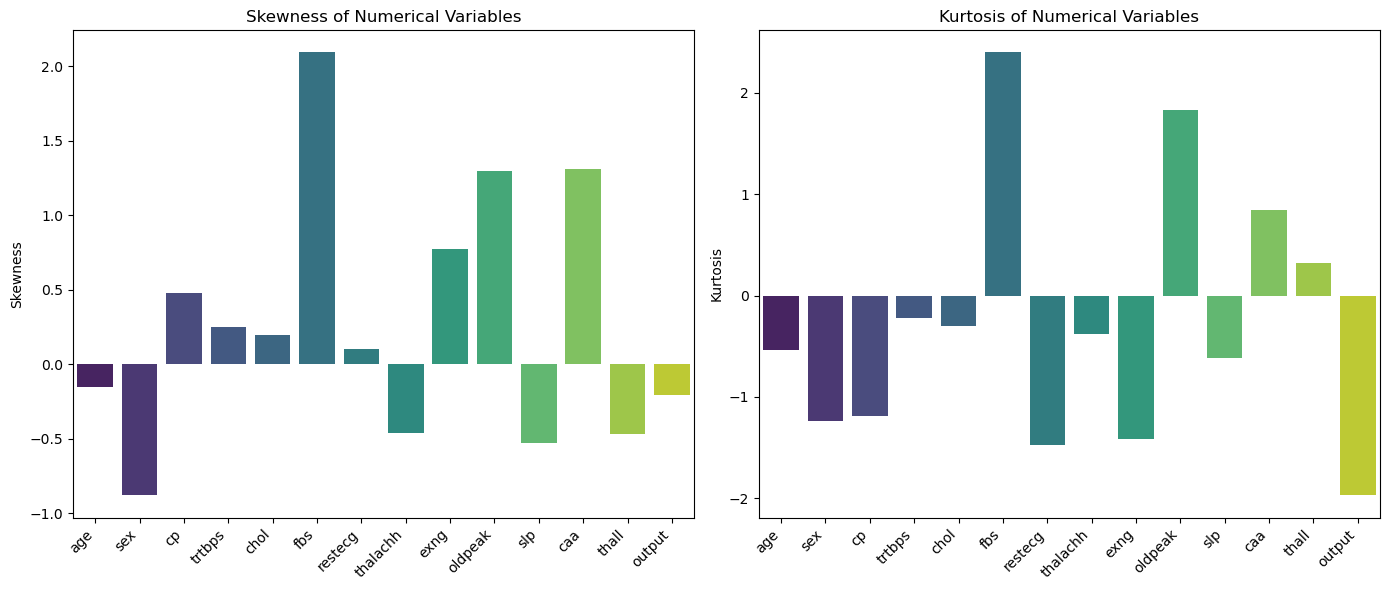

In [31]:

# Lists to store skewness and kurtosis
skewness = []
kurtosis = []
columns = []

# Calculate skewness and kurtosis for each column
for col in numeric_data.columns:
    sk = numeric_data[col].astype(float).skew()
    kt = numeric_data[col].astype(float).kurt()
    
    # Append the values and column name
    skewness.append(sk)
    kurtosis.append(kt)
    columns.append(col)

# Create a DataFrame to hold the skewness and kurtosis values
sk_kt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis}, index=columns)

# Plotting
plt.figure(figsize=(14, 6))

# Skewness plot
plt.subplot(1, 2, 1)
sns.barplot(x=sk_kt_df.index, y=sk_kt_df['Skewness'], palette='viridis')
plt.title('Skewness of Numerical Variables')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Kurtosis plot
plt.subplot(1, 2, 2)
sns.barplot(x=sk_kt_df.index, y=sk_kt_df['Kurtosis'], palette='viridis')
plt.title('Kurtosis of Numerical Variables')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()
plt.show()


These Variabes Have Heavy Skew

Sex 

trtbps

chol

fbs

oldpeak

caa



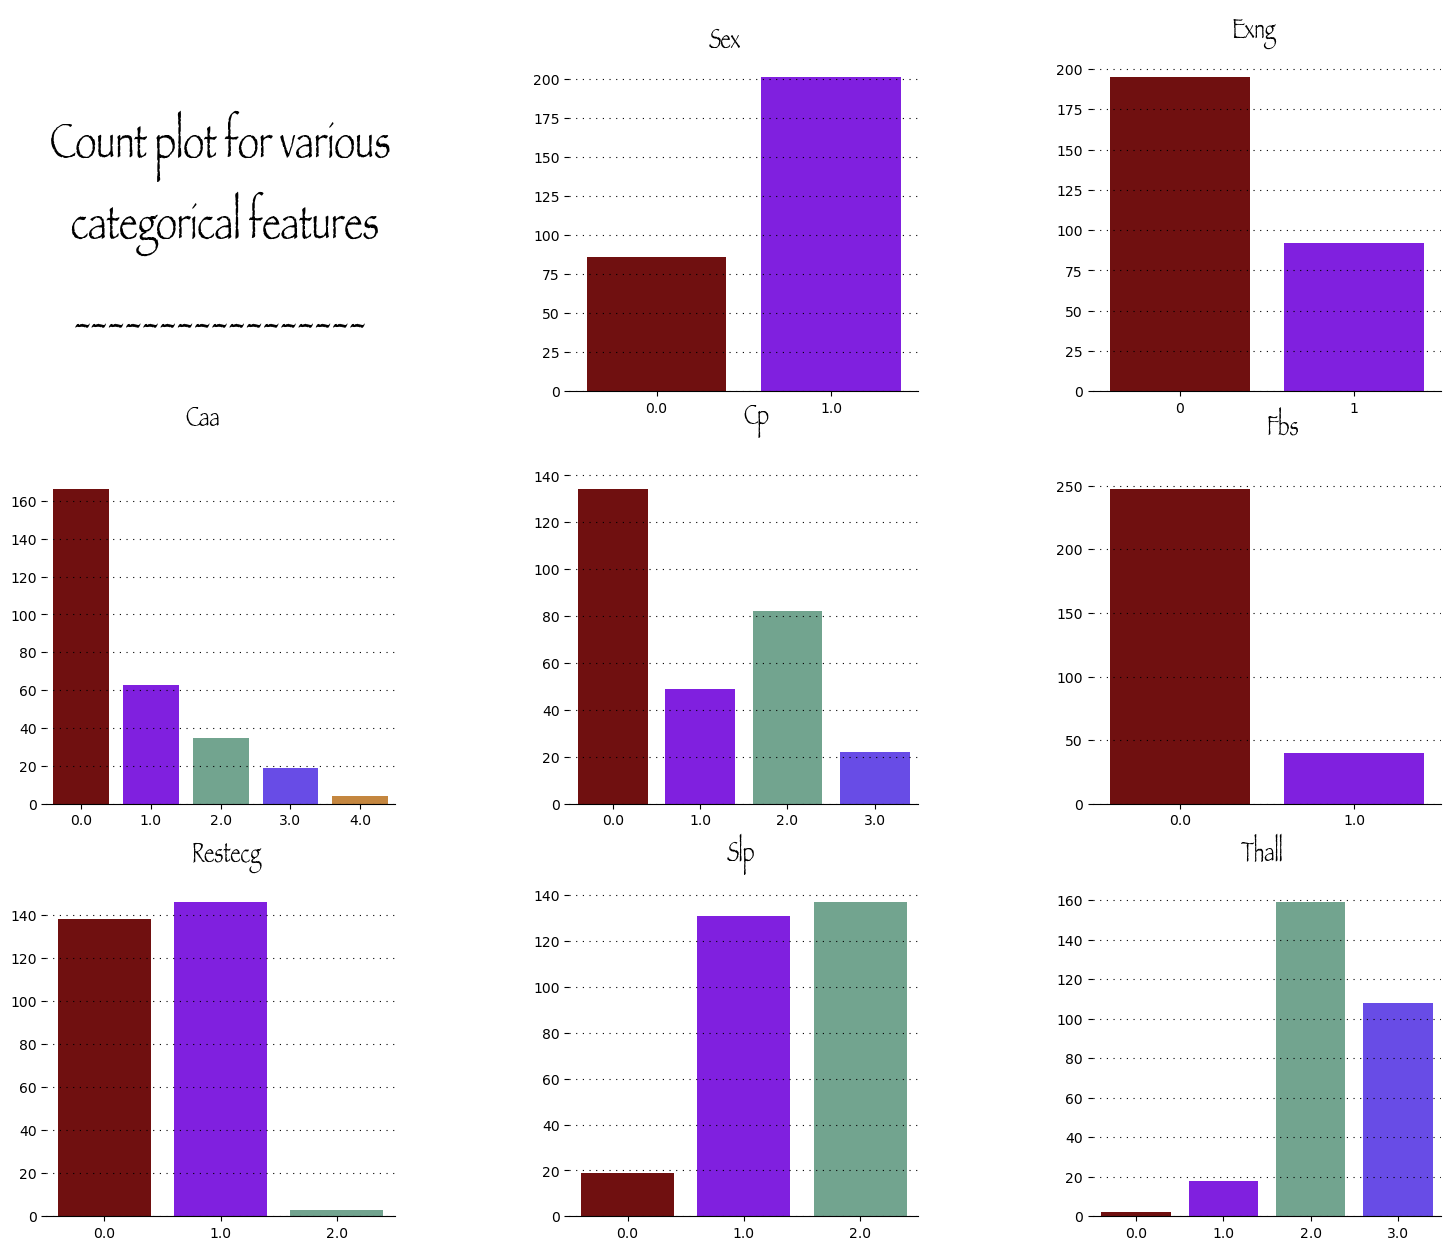

In [45]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=36, fontweight='bold',
         fontfamily='Papyrus',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

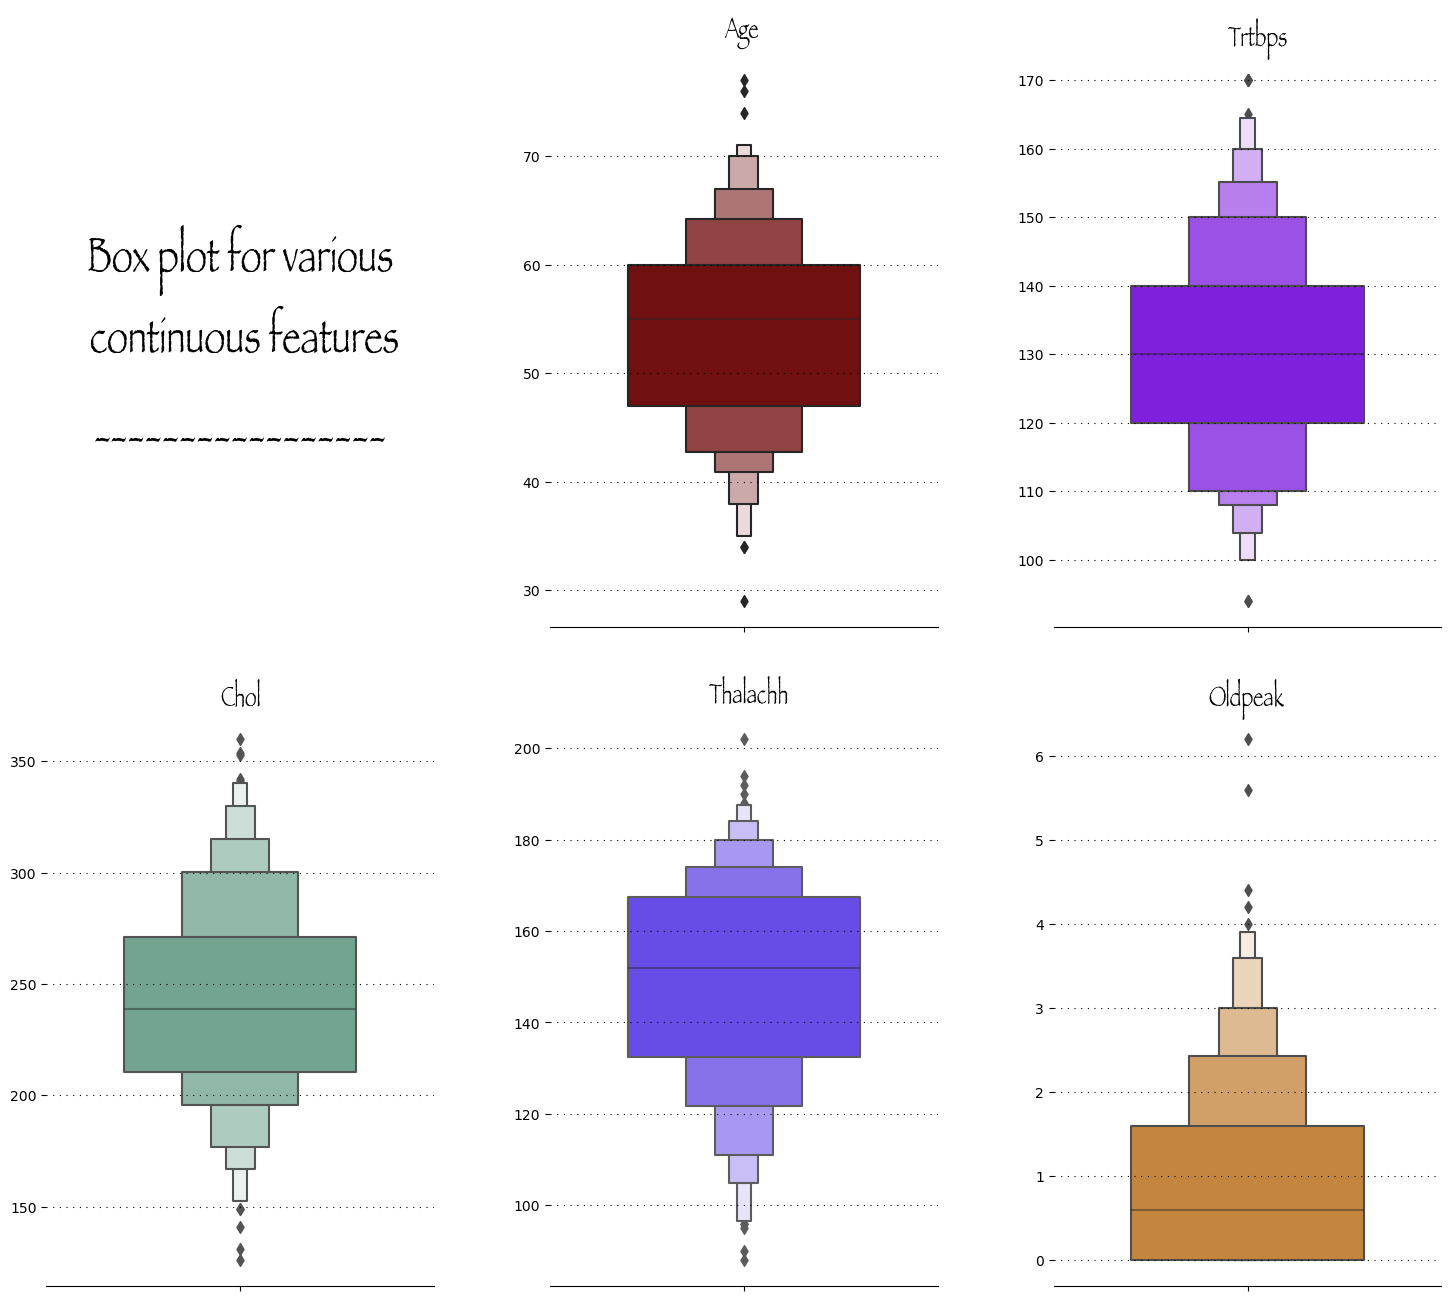

In [42]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=36, fontweight='bold',
         fontfamily='Papyrus',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 175, 'Trtbps', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 375, 'Chol', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

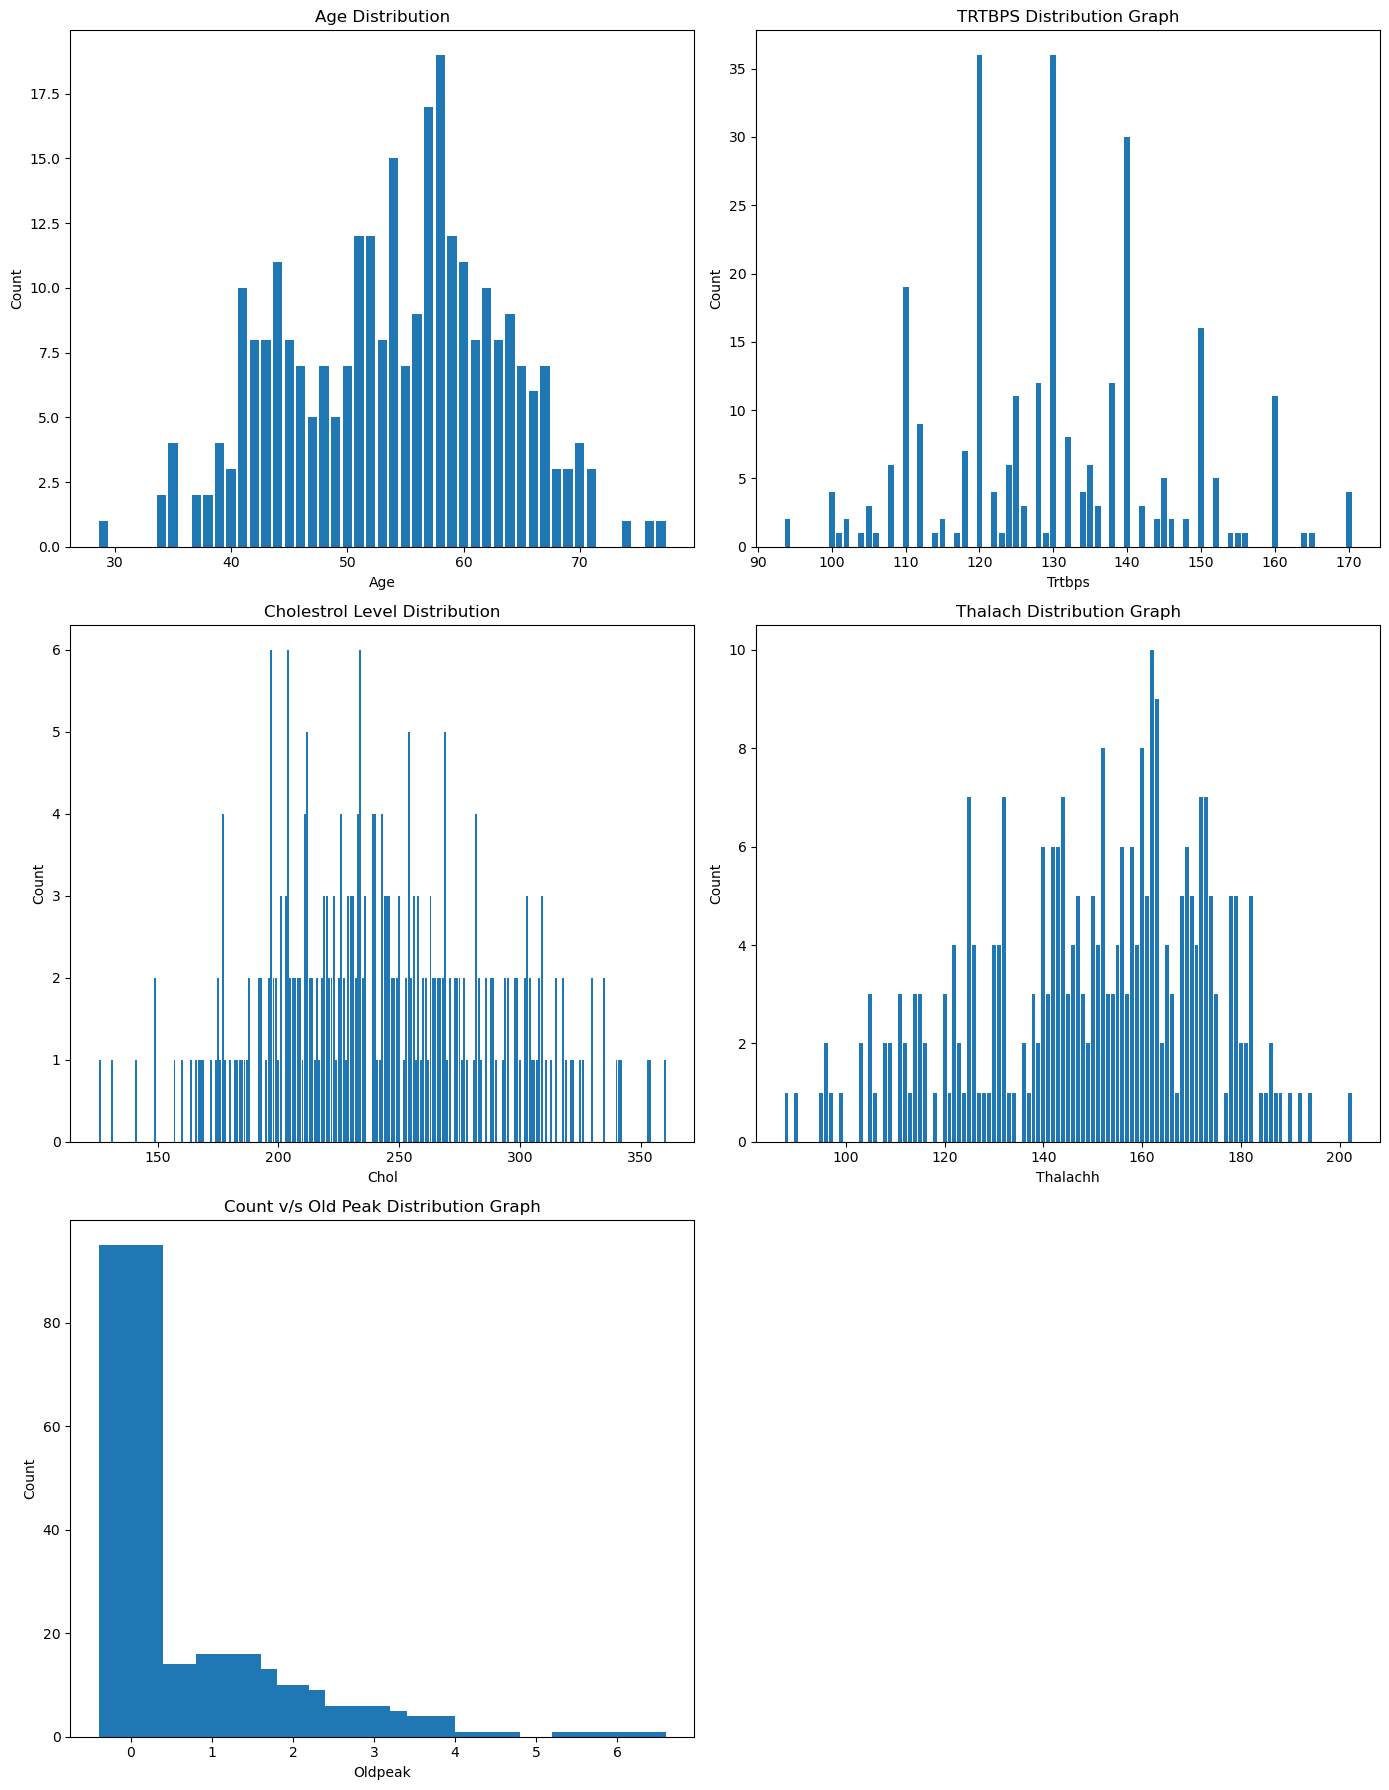

In [56]:
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))  # Adjust the size as needed

# Flatten the array of axes for easy iterating
axes = axes.flatten()

# Variables to plot
variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Titles for the plots
titles = ['Age Distribution', 'TRTBPS Distribution Graph', 'Cholestrol Level Distribution',
          'Thalach Distribution Graph', 'Count v/s Old Peak Distribution Graph']

# Iterate over the variables and create bar plots
for i, var in enumerate(variables):
    counts = df[var].value_counts()
    x_labels = counts.index
    y_values = counts.values
    axes[i].bar(x_labels, y_values)
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].set_title(titles[i])

# Hide the 6th subplot (since we have only 5 variables to plot)
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


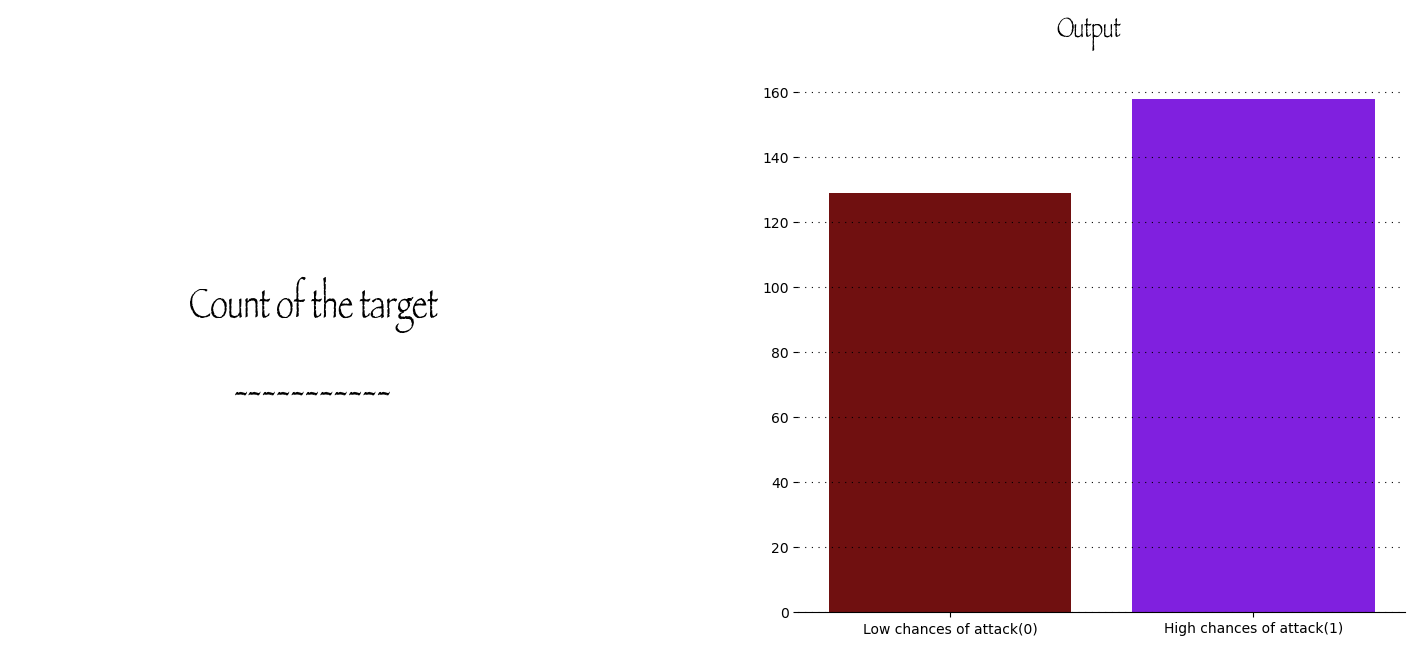

In [43]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 30,
        fontweight='bold',
        fontfamily='Papyrus',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

 3. **Multivariate Graphical/Nongraphical** <br>
Here we inspect the correlation between each pair of numeric variables.<br>
Our focus is of course, the first row (excluding first entry) enumerating the correlation coefficients for each of the predictors.

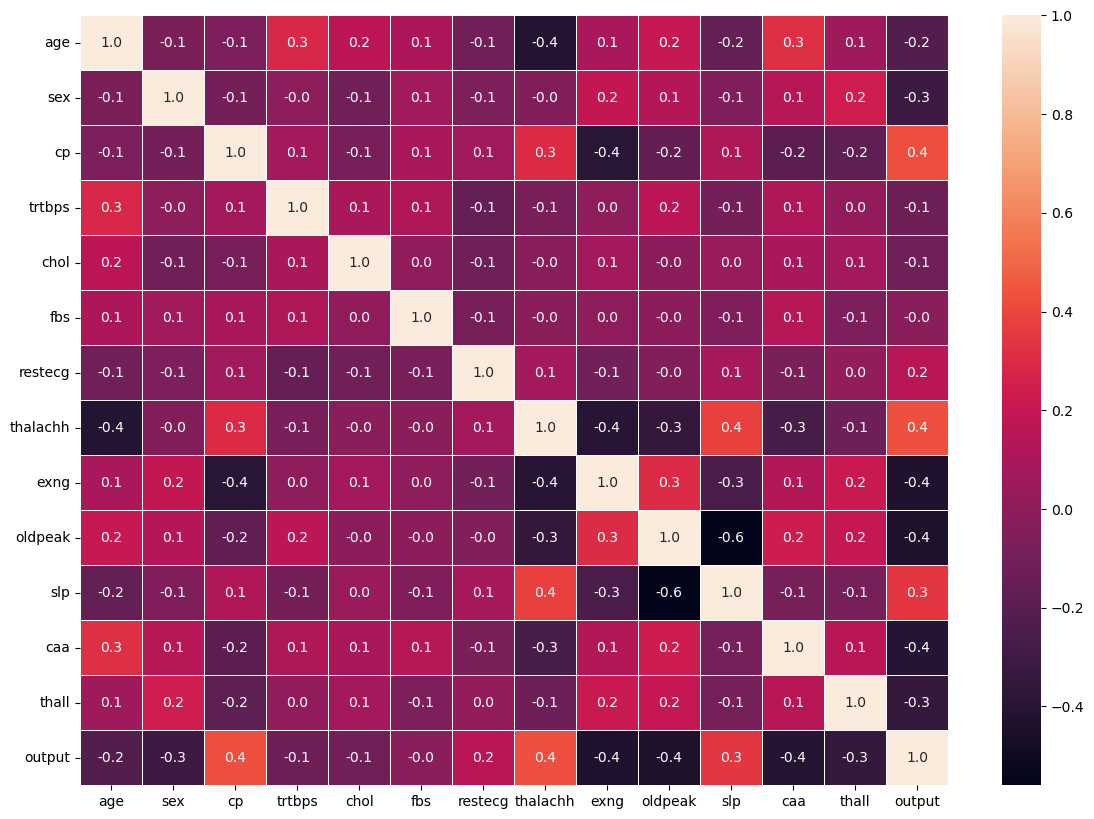

In [46]:
# Correlation Matrix


# Heatmap of the Correlation Matrix
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

We conclude from the heatmap the following:
1.
2. 
3. 

As such, we will primarily be using ____ for further numerical analysis.

### 2b. Categorical EDA
1. Univariate non-graphical
2. Univariate graphical
3. Multivariate graphical

1. **Univariate nongraphical** <br>
We inspect the numbers and proportions of each category in this section

2. **Univariate graphical** <br>
We inspect the visualised proportions using barplots, then the visualised distributions using boxplots.

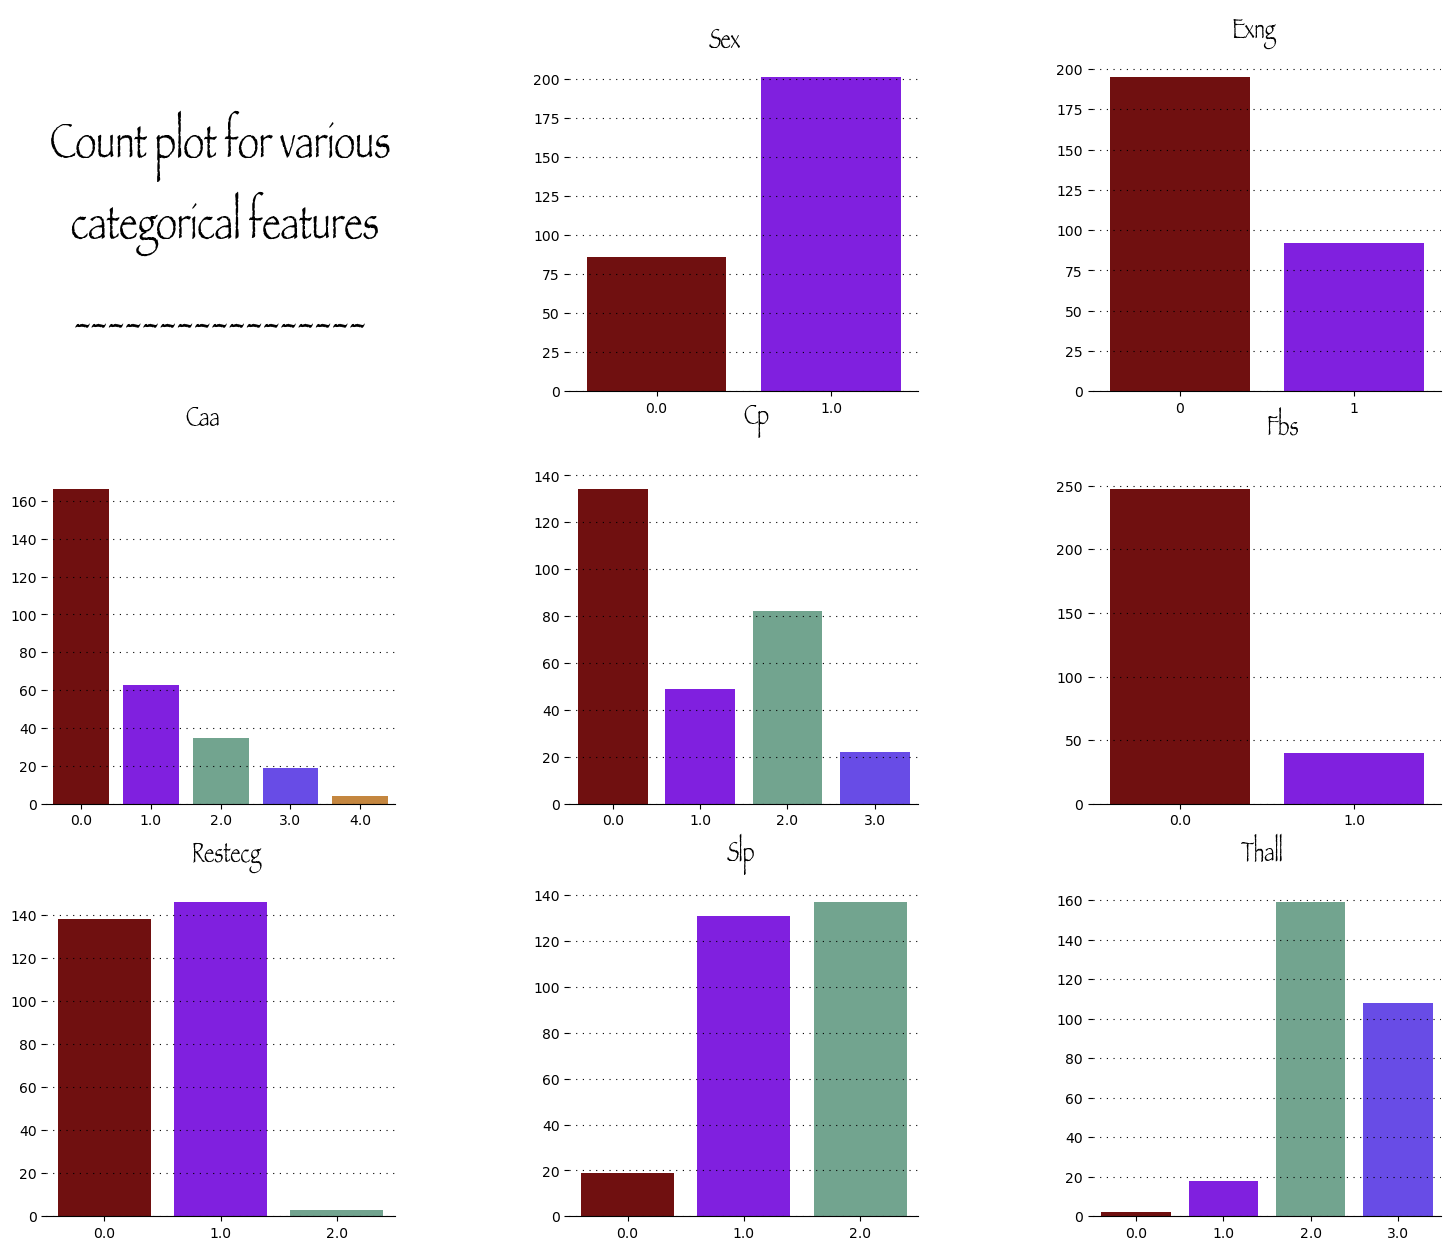

In [47]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=36, fontweight='bold',
         fontfamily='Papyrus',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

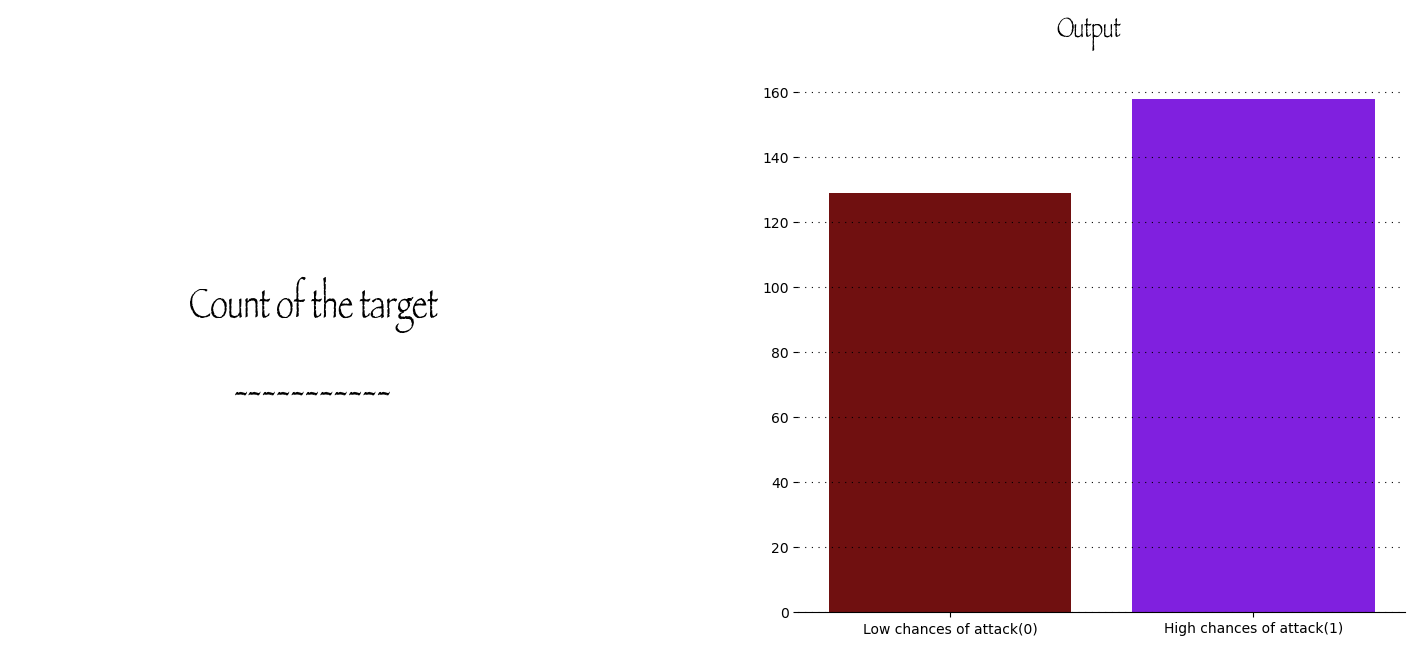

In [48]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 30,
        fontweight='bold',
        fontfamily='Papyrus',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=20, fontweight='bold', fontfamily='Papyrus', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

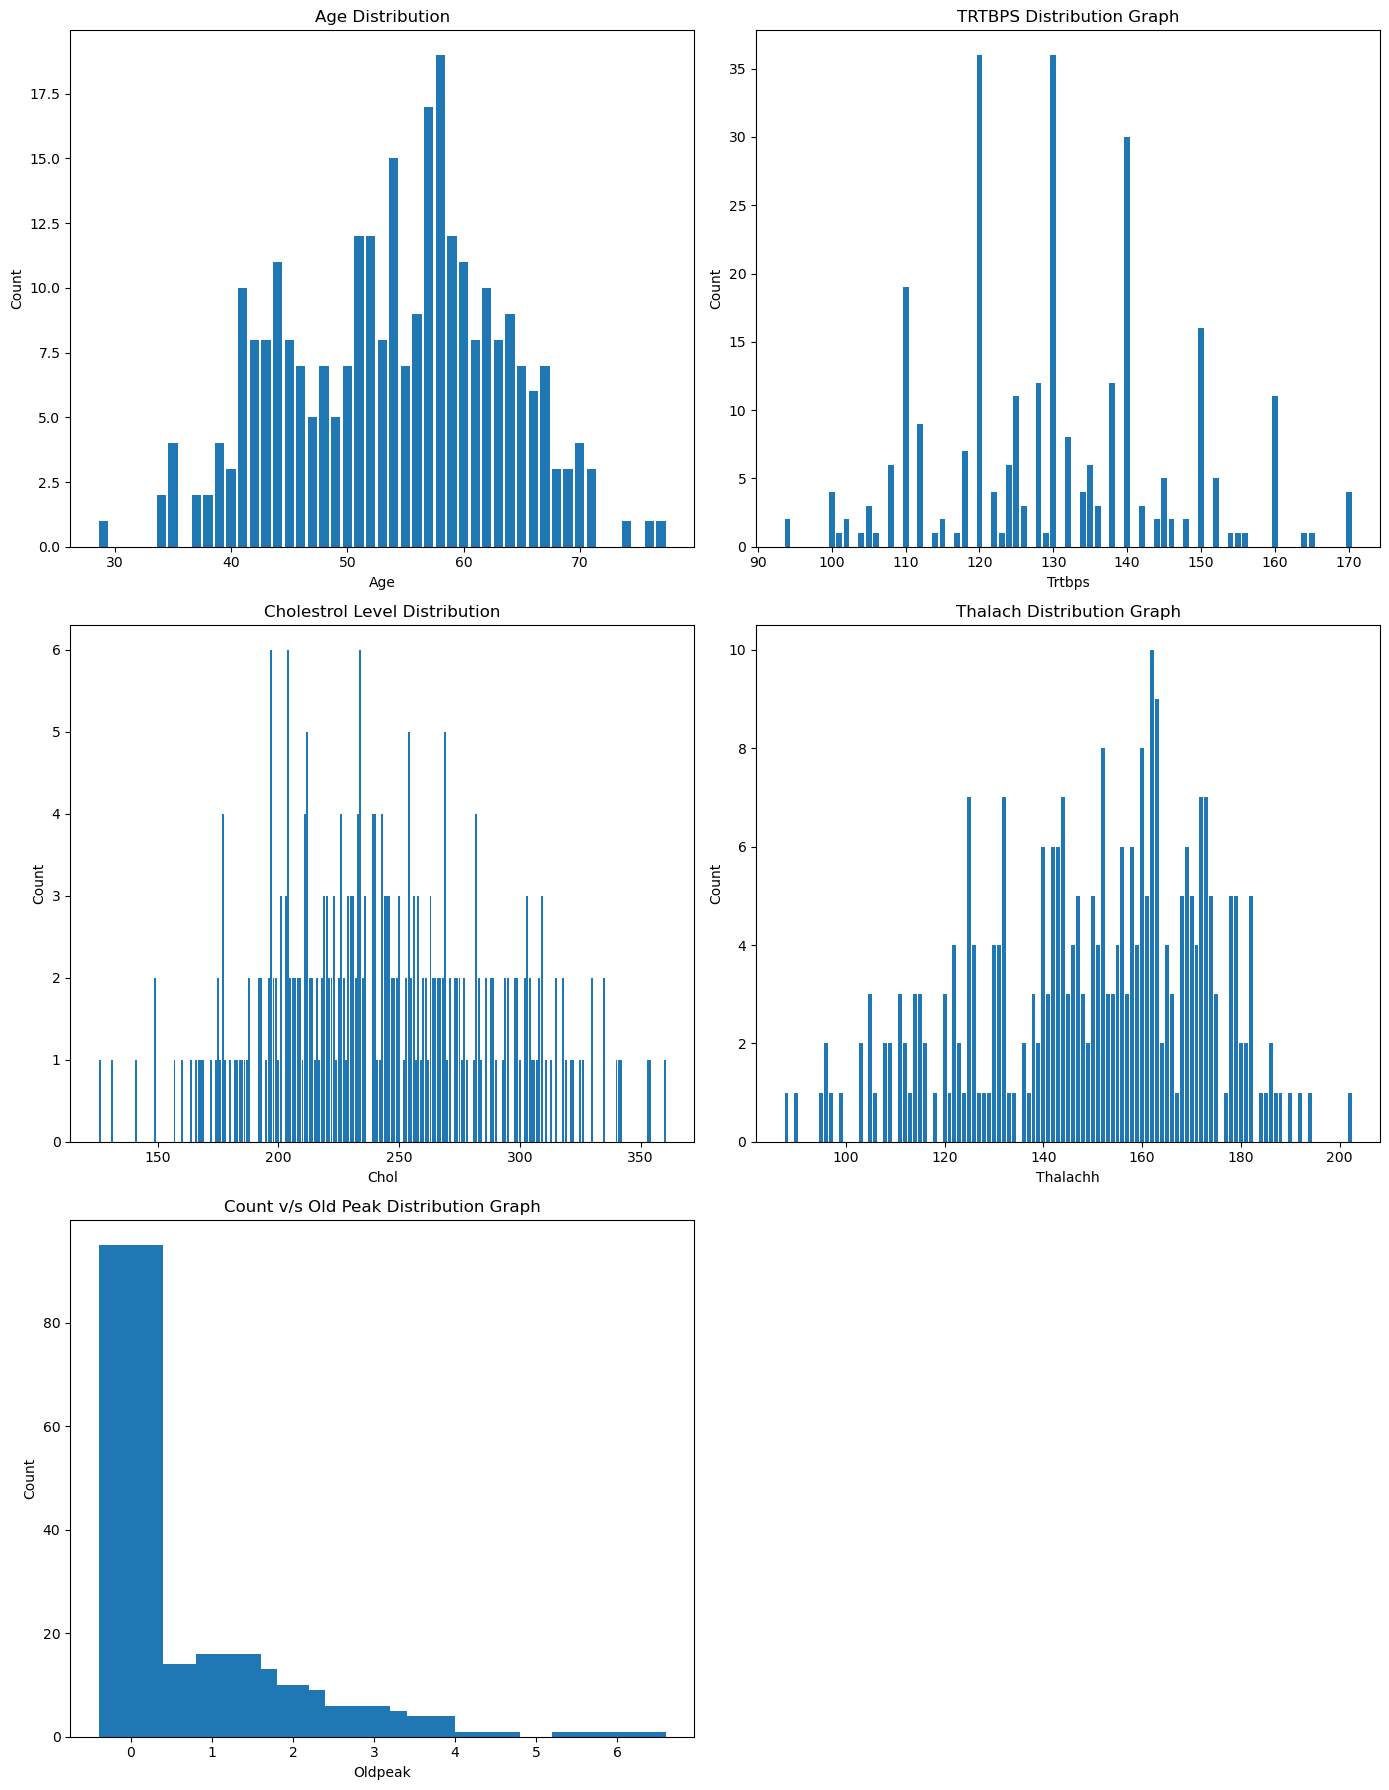

In [55]:
counts = df['age'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')


plt.show()

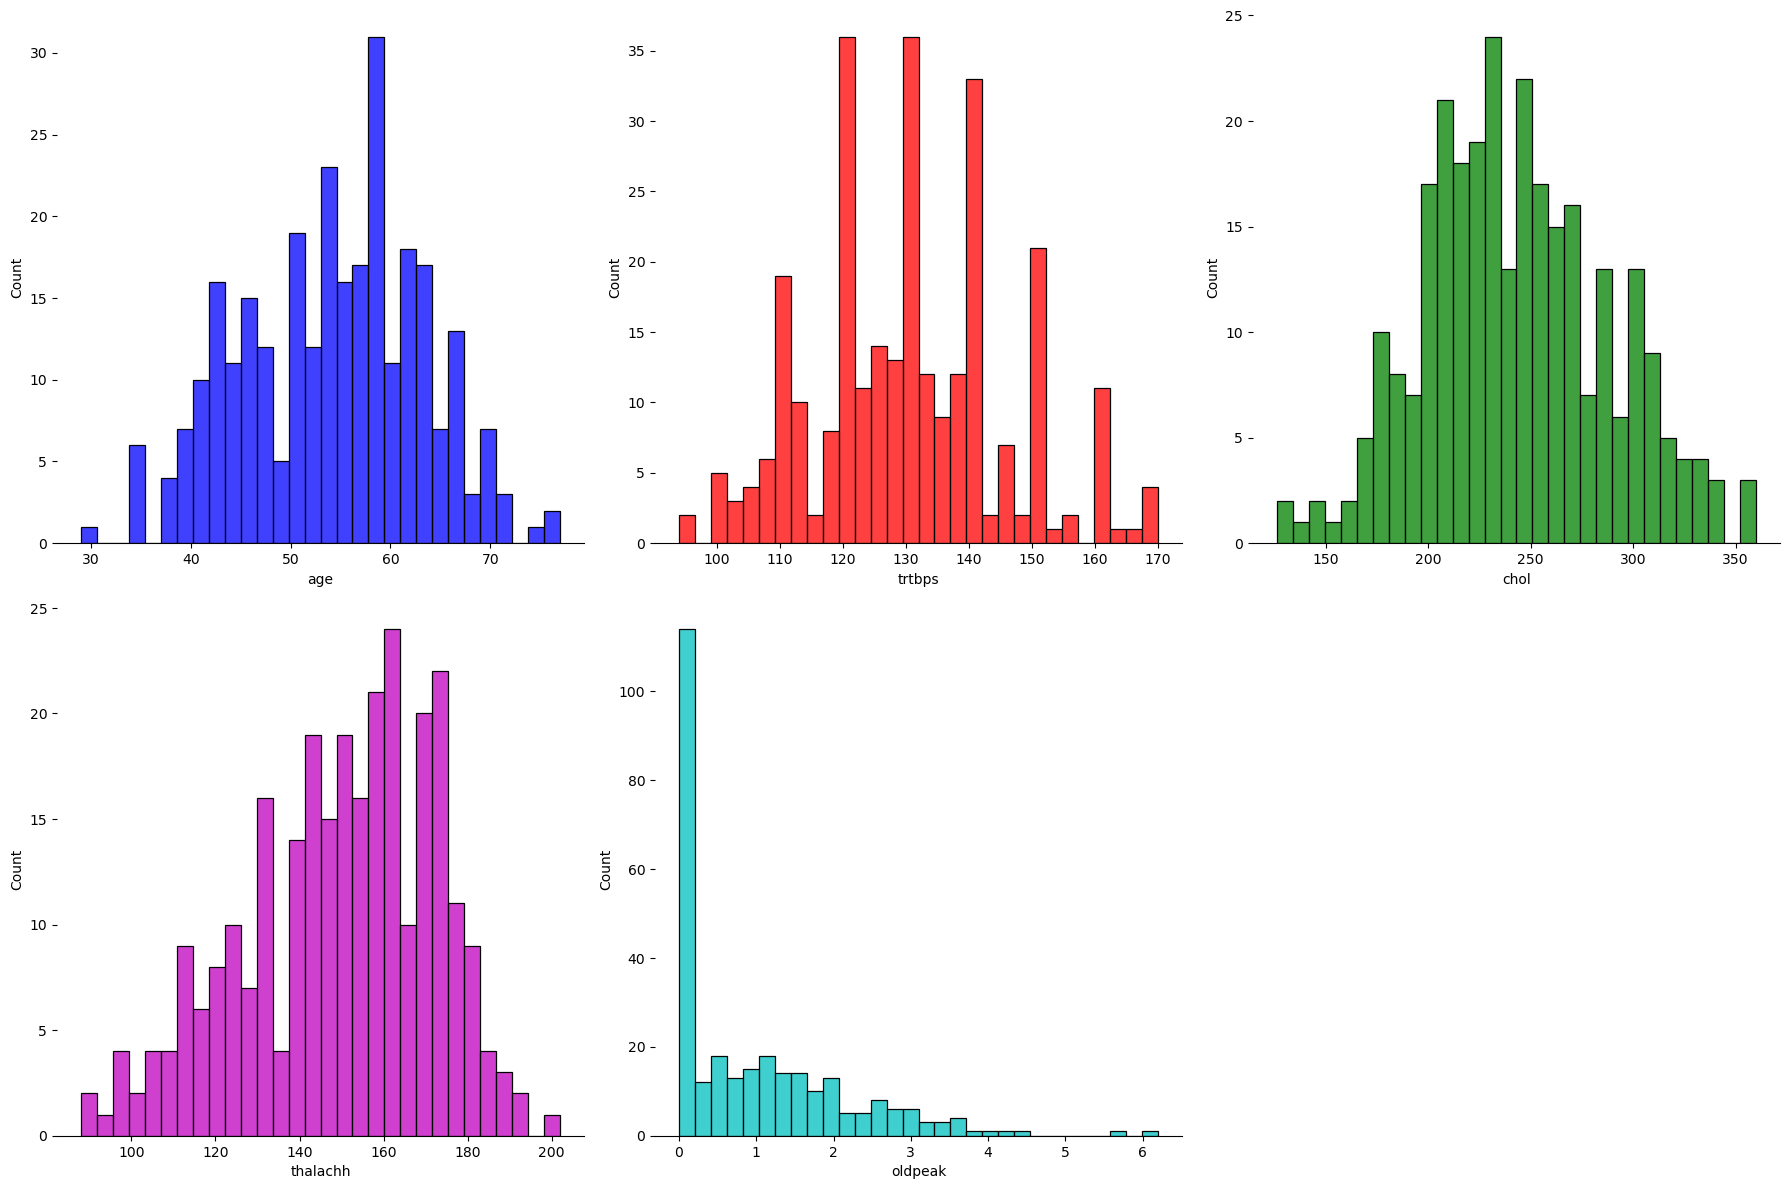

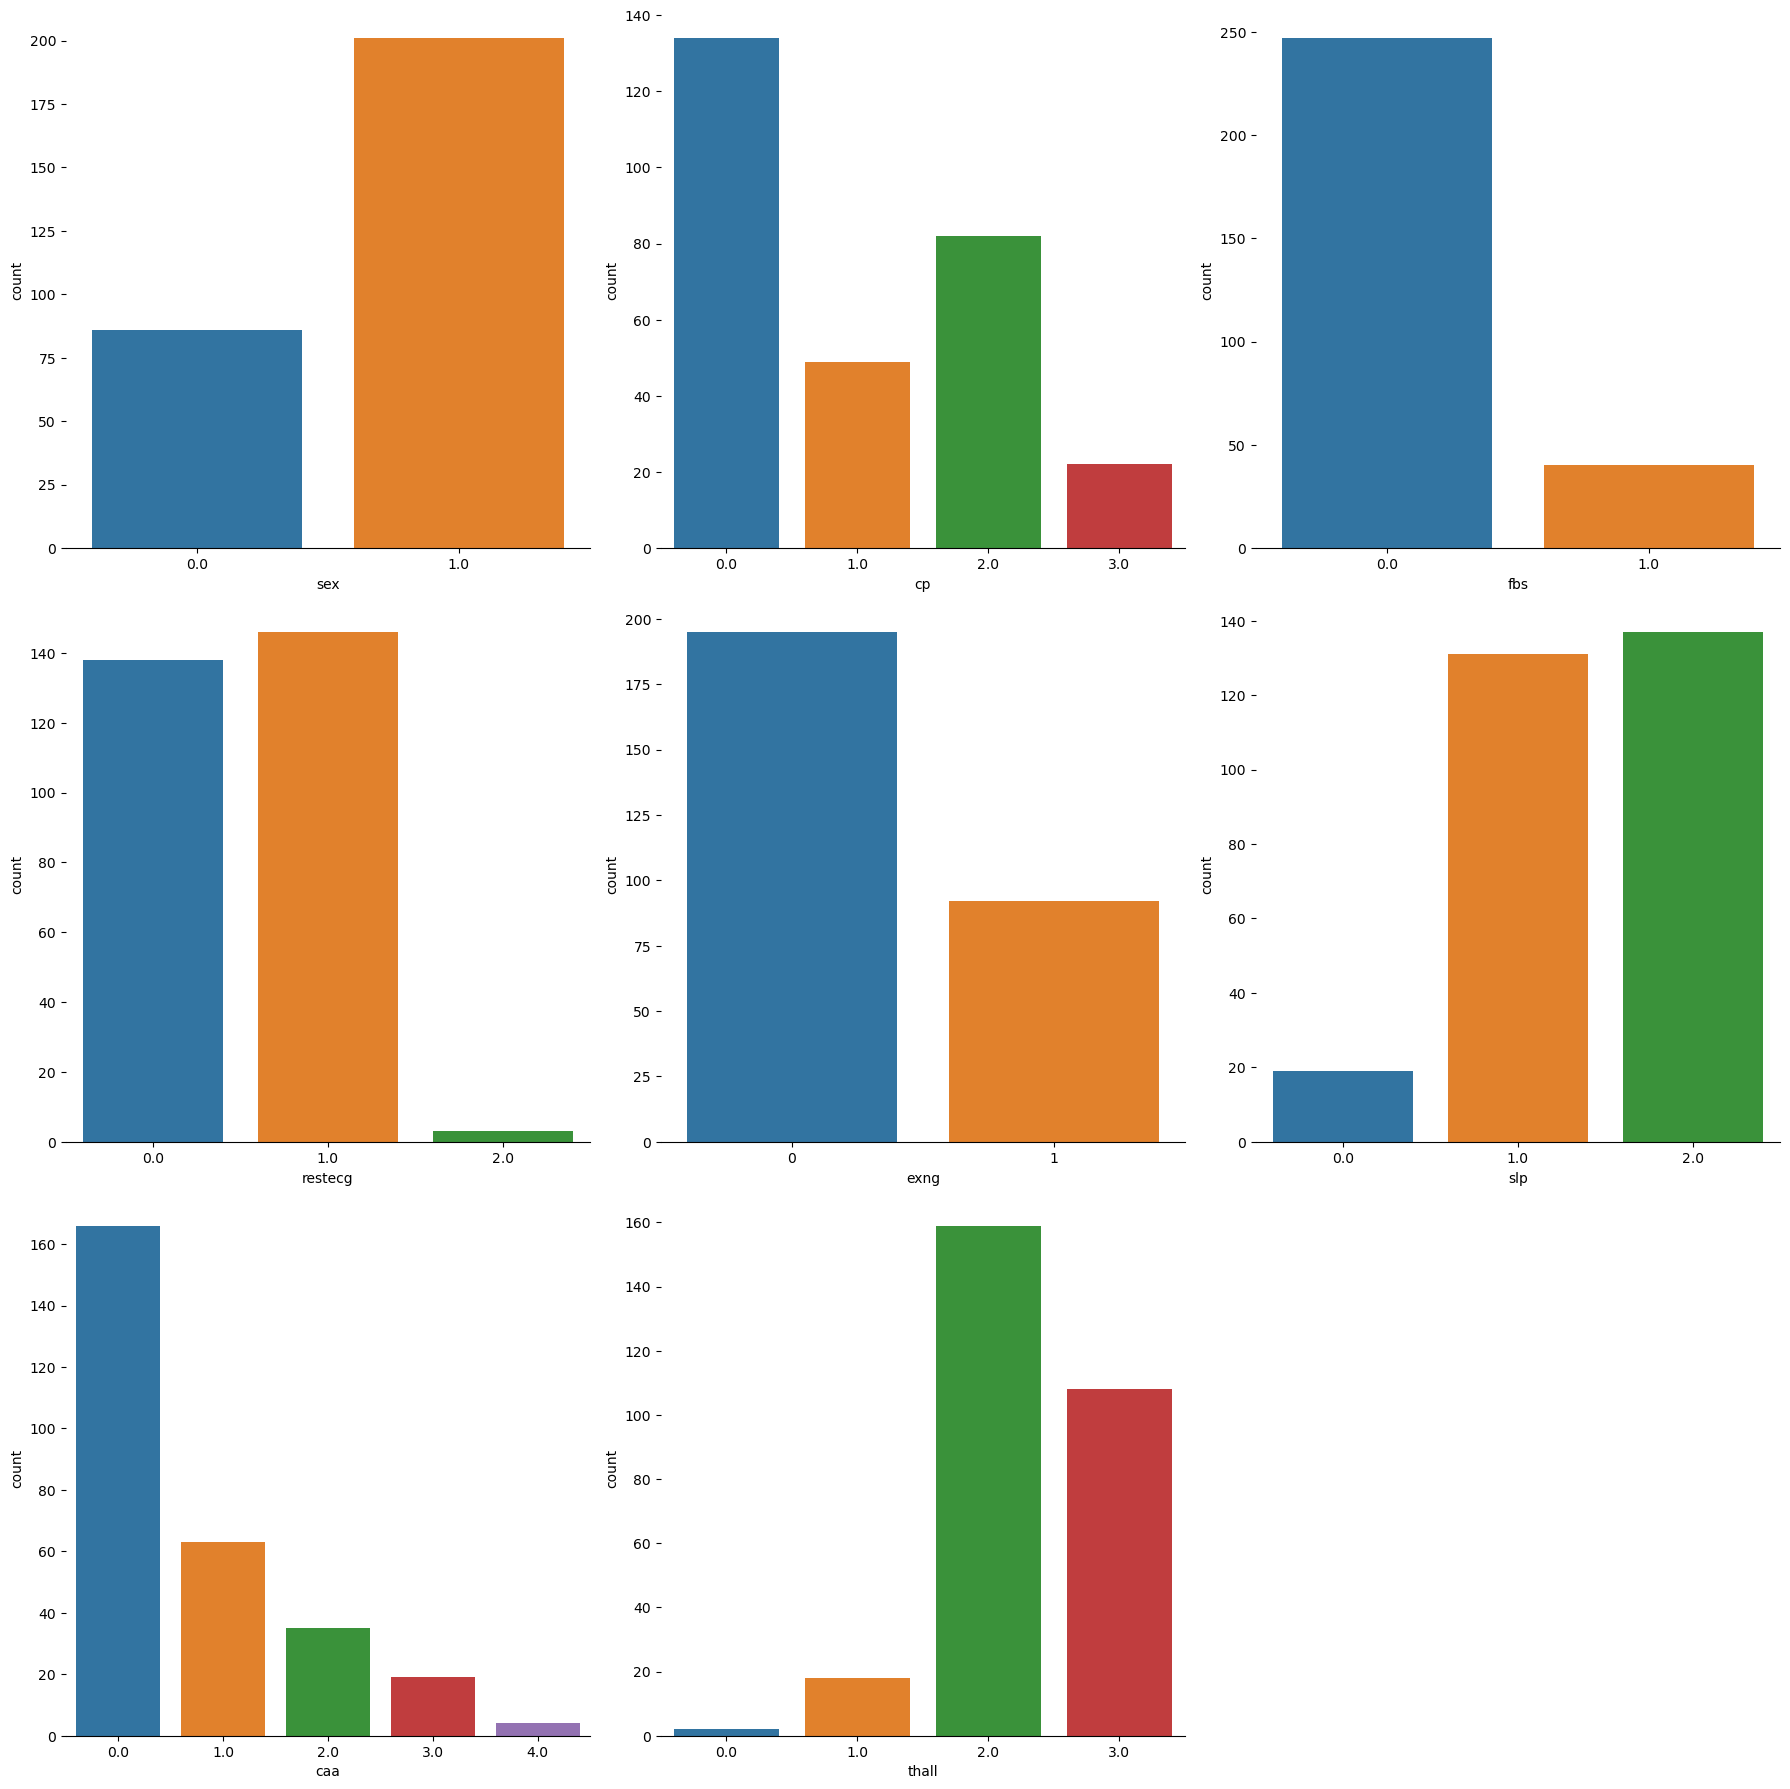

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure for numerical variables
f, axes_num = plt.subplots(2, 3, figsize=(18, 12), sharex=False)
sns.despine(left=True)

# Histograms for numerical variables
sns.histplot(df['age'], bins=30, kde=False, color="b", ax=axes_num[0, 0])
sns.histplot(df['trtbps'], bins=30, kde=False, color="r", ax=axes_num[0, 1])
sns.histplot(df['chol'], bins=30, kde=False, color="g", ax=axes_num[0, 2])
sns.histplot(df['thalachh'], bins=30, kde=False, color="m", ax=axes_num[1, 0])
sns.histplot(df['oldpeak'], bins=30, kde=False, color="c", ax=axes_num[1, 1])

# Hide the 6th subplot (as there are only 5 numerical variables)
axes_num[1, 2].set_visible(False)

plt.tight_layout()

# Set up the matplotlib figure for categorical variables
f, axes_cat = plt.subplots(3, 3, figsize=(18, 18), sharex=False)
sns.despine(left=True)

# Count plots for categorical variables
sns.countplot(x='sex', data=df, ax=axes_cat[0, 0])
sns.countplot(x='cp', data=df, ax=axes_cat[0, 1])
sns.countplot(x='fbs', data=df, ax=axes_cat[0, 2])
sns.countplot(x='restecg', data=df, ax=axes_cat[1, 0])
sns.countplot(x='exng', data=df, ax=axes_cat[1, 1])
sns.countplot(x='slp', data=df, ax=axes_cat[1, 2])
sns.countplot(x='caa', data=df, ax=axes_cat[2, 0])
sns.countplot(x='thall', data=df, ax=axes_cat[2, 1])

# Hide the 9th subplot (as there are only 8 categorical variables)
axes_cat[2, 2].set_visible(False)

plt.tight_layout()


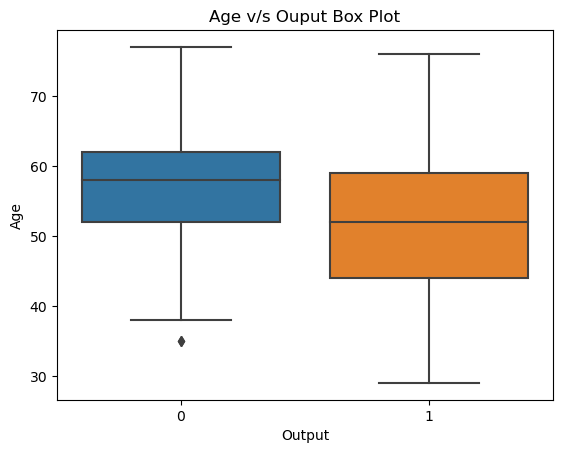

In [160]:
sns.boxplot(x='output', y='age', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Age')
plt.title('Age v/s Ouput Box Plot')

# show the plot
plt.show()

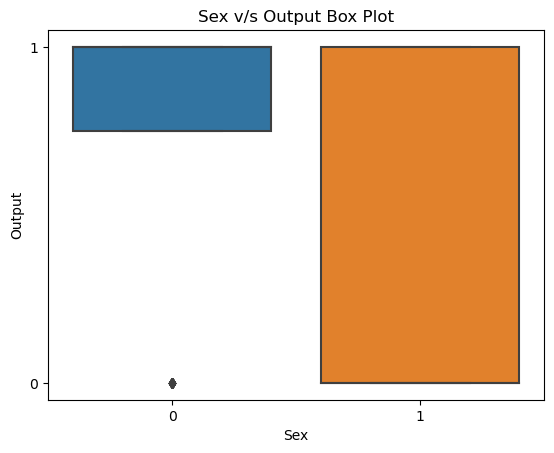

In [171]:
sns.boxplot(x='sex', y='output', data=df)

# add x and y labels and a title
plt.xlabel('Sex')
plt.ylabel('Output')
plt.title('Sex v/s Output Box Plot')
plt.xticks([0,1])
plt.yticks([0,1])
# show the plot
plt.show()

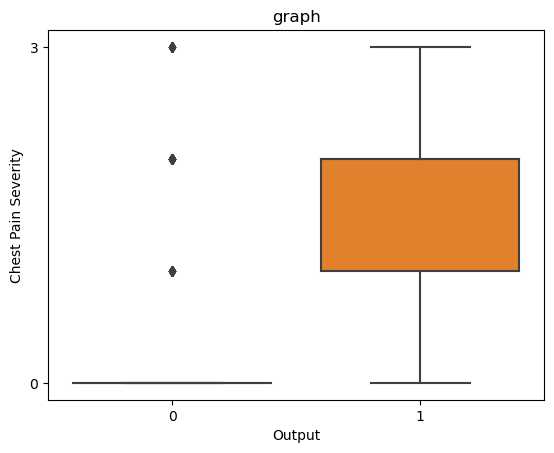

In [176]:
sns.boxplot(x='output', y='cp', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Chest Pain Severity')
plt.title('graph')
plt.xticks([0,1])
plt.yticks([0,3])
# show the plot
plt.show()

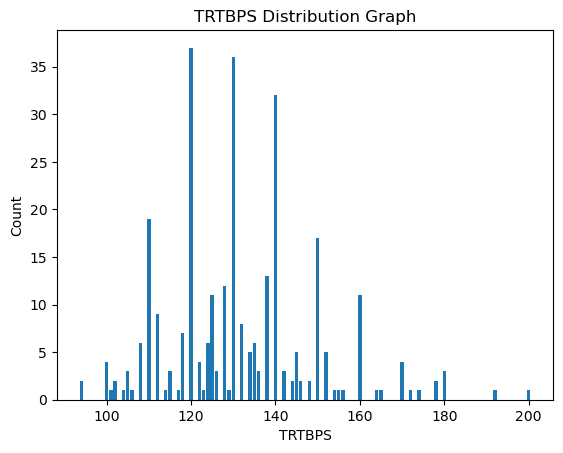

In [178]:
counts = df['trtbps'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('TRTBPS')
plt.ylabel('Count')
plt.title('TRTBPS Distribution Graph')


plt.show()

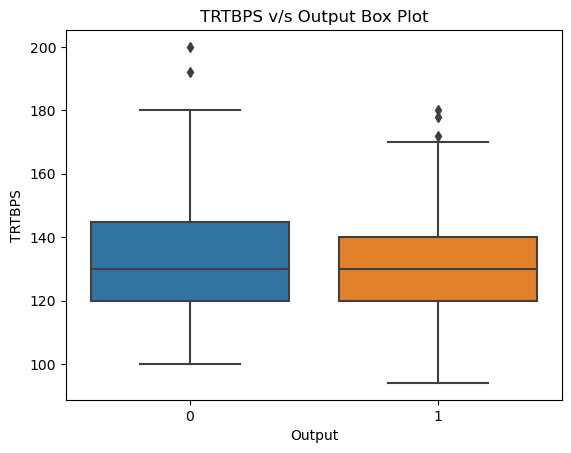

In [179]:
sns.boxplot(x='output', y='trtbps', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('TRTBPS')
plt.title('TRTBPS v/s Output Box Plot')


# show the plot
plt.show()

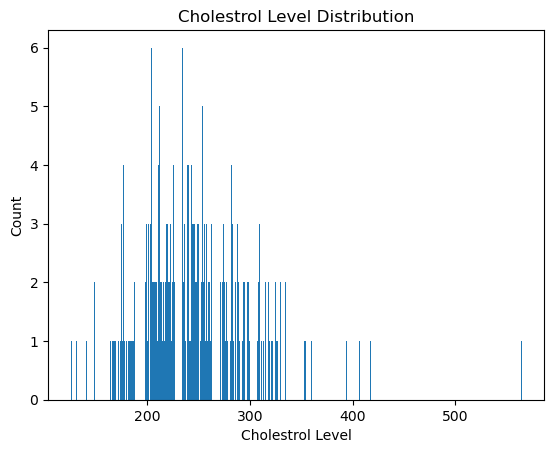

In [181]:
counts = df['chol'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Cholestrol Level')
plt.ylabel('Count')
plt.title('Cholestrol Level Distribution')


plt.show()

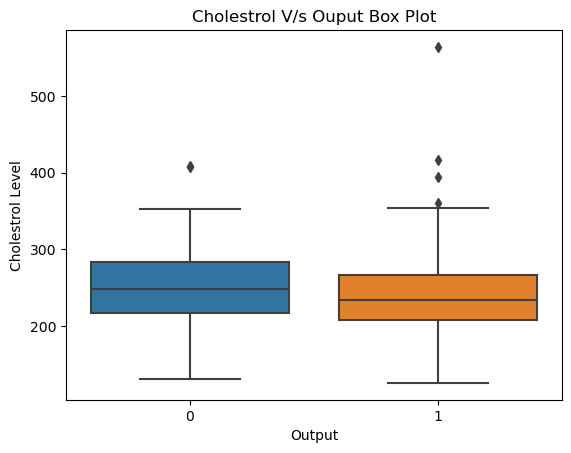

In [183]:
sns.boxplot(x='output', y='chol', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Cholestrol Level')
plt.title('Cholestrol V/s Ouput Box Plot')

# show the plot
plt.show()

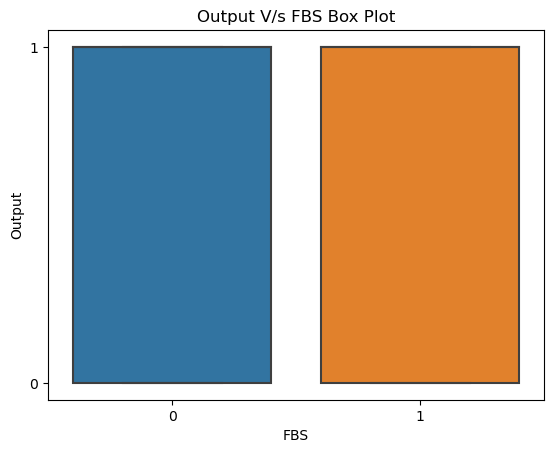

In [188]:
sns.boxplot(x='fbs', y='output', data=df)

# add x and y labels and a title
plt.xlabel('FBS')
plt.ylabel('Output')
plt.title('Output V/s FBS Box Plot')

plt.yticks([0,1])
plt.xticks([0,1])
# show the plot
plt.show()

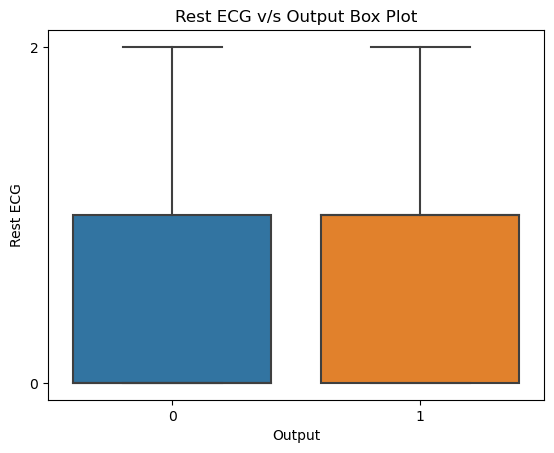

In [197]:
sns.boxplot(x='output', y='restecg', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Rest ECG')
plt.title('Rest ECG v/s Output Box Plot')

plt.yticks([0,2])
plt.xticks([0,1])
# show the plot
plt.show()

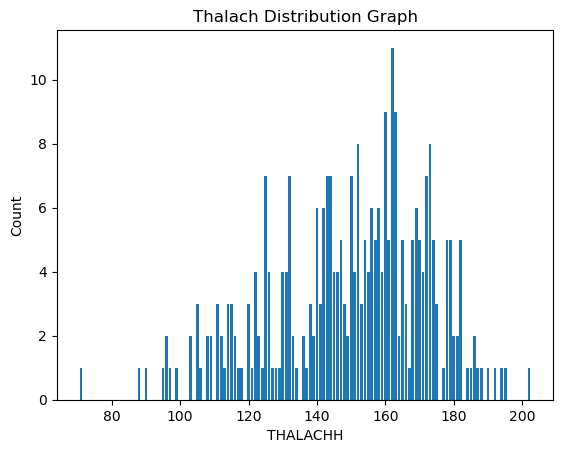

In [199]:
counts = df['thalachh'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('THALACHH')
plt.ylabel('Count')
plt.title('Thalach Distribution Graph')


plt.show()

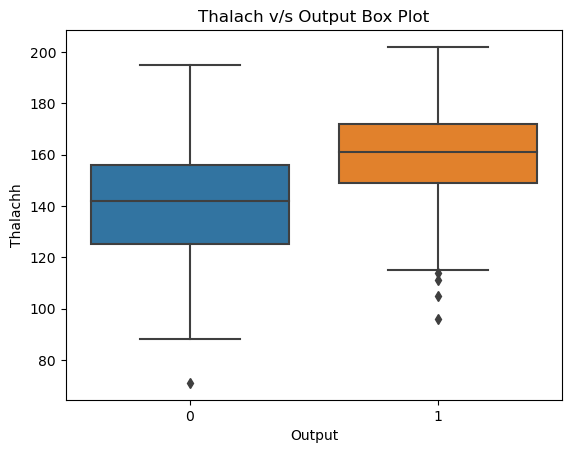

In [201]:
sns.boxplot(x='output', y='thalachh', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Thalachh')
plt.title('Thalach v/s Output Box Plot')

# show the plot
plt.show()

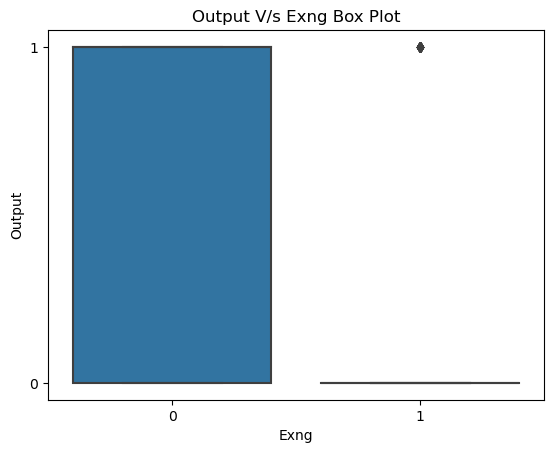

In [206]:
sns.boxplot(x='exng', y='output', data=df)

# add x and y labels and a title
plt.xlabel('Exng')
plt.ylabel('Output')
plt.title('Output V/s Exng Box Plot')

plt.yticks([0,1])
plt.yticks([0,1])
# show the plot
plt.show()

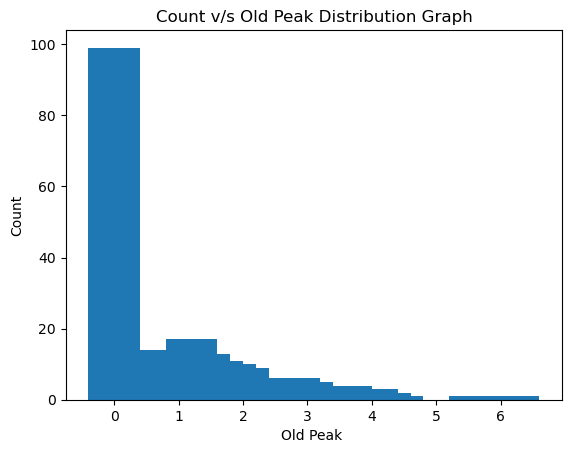

In [212]:
counts = df['oldpeak'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Old Peak ')
plt.ylabel('Count')
plt.title('Count v/s Old Peak Distribution Graph')


plt.show()

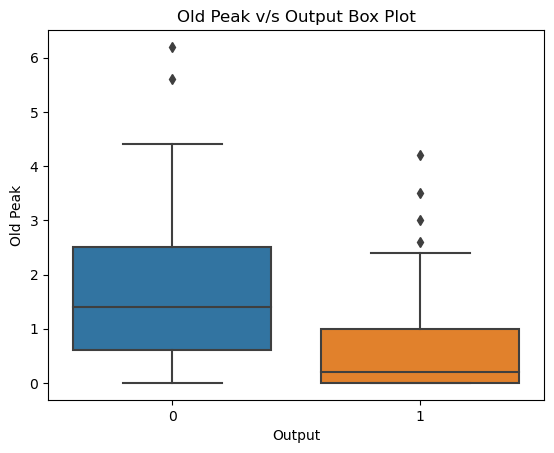

In [210]:
sns.boxplot(x='output', y='oldpeak', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Old Peak')
plt.title('Old Peak v/s Output Box Plot')

# show the plot
plt.show()

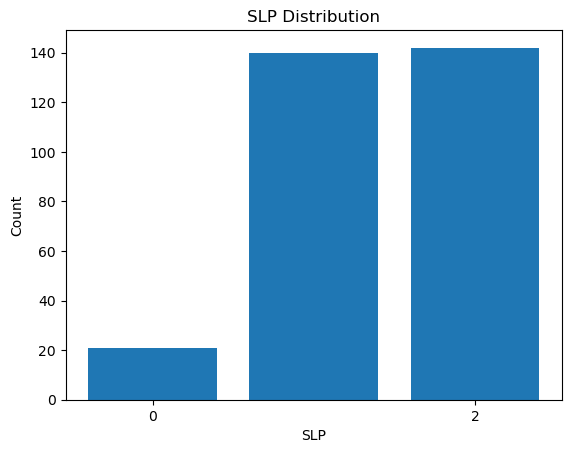

In [220]:
counts = df['slp'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('SLP')
plt.ylabel('Count')
plt.title('SLP Distribution')

plt.xticks([0,2])
plt.show()

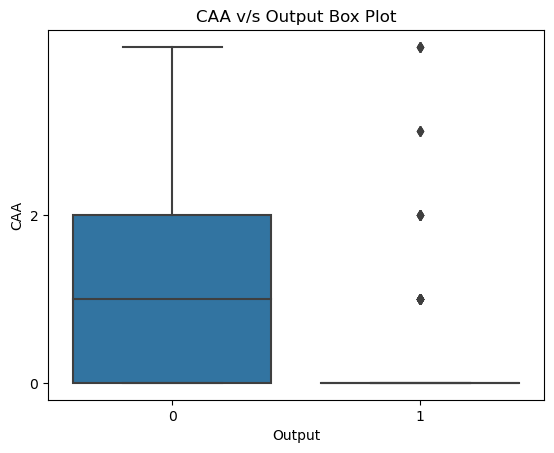

In [223]:
sns.boxplot(x='output', y='caa', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('CAA')
plt.title('CAA v/s Output Box Plot')
plt.yticks([0,2])
# show the plot
plt.show()

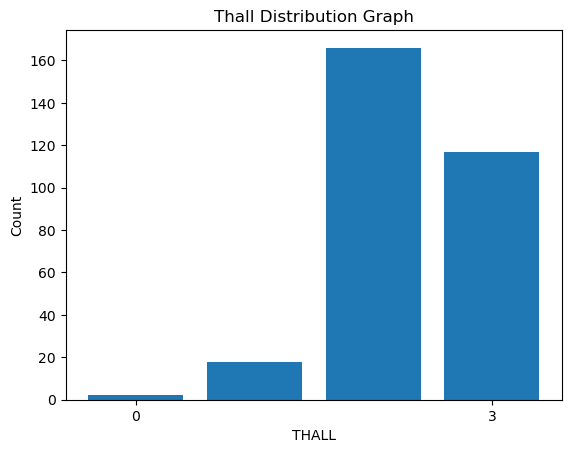

In [228]:
counts = df['thall'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('THALL')
plt.ylabel('Count')
plt.title('Thall Distribution Graph')
plt.xticks([0,3])

plt.show()

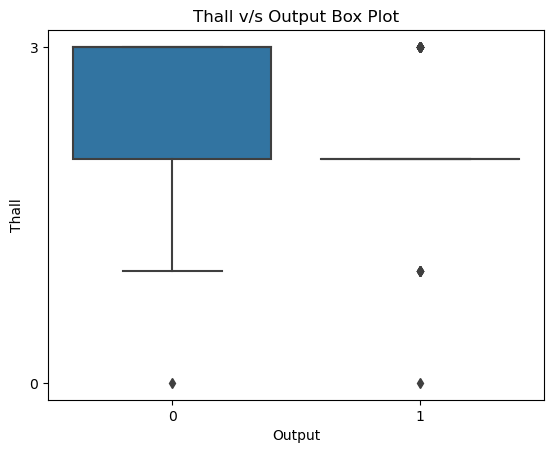

In [229]:
sns.boxplot(x='output', y='thall', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Thall')
plt.title('Thall v/s Output Box Plot')
plt.yticks([0,3])
# show the plot
plt.show()

### Bivariate data analysis with scatter plot

In [230]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

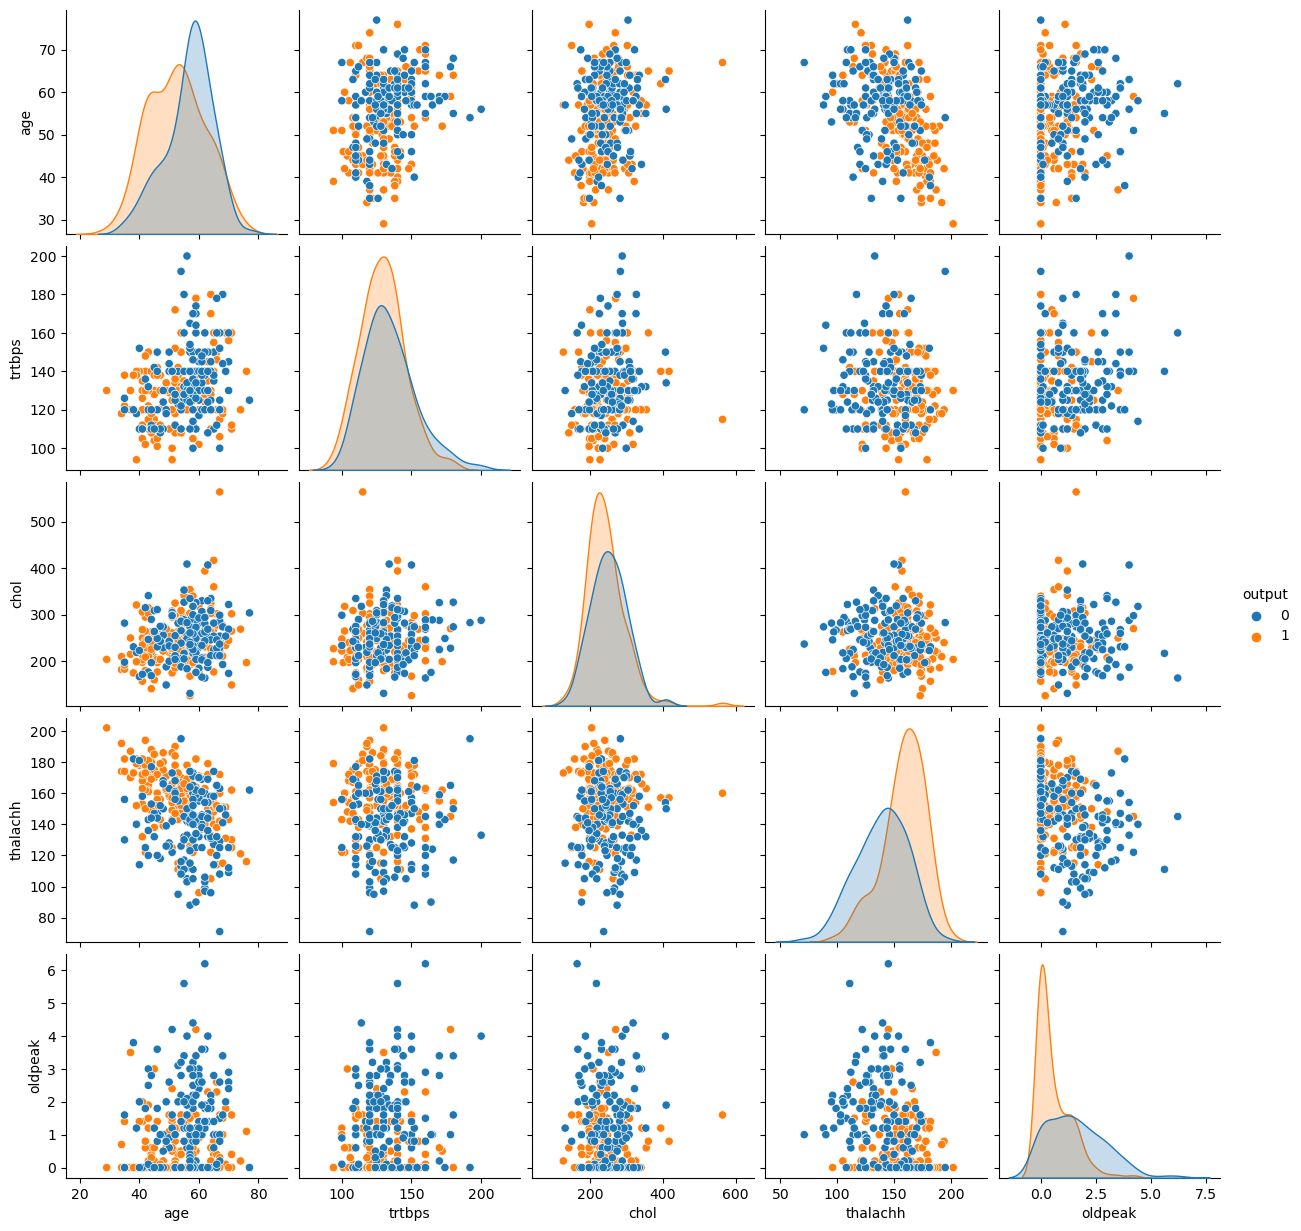

In [231]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()